<a href="https://colab.research.google.com/github/harishankarr23/machine-learning/blob/main/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv("/content/train-data.csv")

In [ ]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
df.tail()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65
6018,6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,NaN,2.50


In [ ]:
df.shape

(6019, 14)

In [ ]:
df.dtypes

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [ ]:
df.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [ ]:
#drop unnamed:0
#drop New_Price because the percentage of missing values exceed 90%

In [ ]:
name_count=df["Name"].value_counts()
name_count

Mahindra XUV500 W8 2WD           49
Maruti Swift VDI                 45
Honda City 1.5 S MT              34
Maruti Swift Dzire VDI           34
Maruti Swift VDI BSIV            31
                                 ..
Ford Fiesta Titanium 1.5 TDCi     1
Mahindra Scorpio S10 AT 4WD       1
Hyundai i20 1.2 Era               1
Toyota Camry W4 (AT)              1
Mahindra Xylo D4 BSIV             1
Name: Name, Length: 1878, dtype: int64

In [ ]:
location_count=df["Location"].value_counts()
location_count

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

In [ ]:
fuel_type_count=df["Fuel_Type"].value_counts()
fuel_type_count

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

In [ ]:
Transmission_count=df["Transmission"].value_counts()
Transmission_count

Manual       4299
Automatic    1720
Name: Transmission, dtype: int64

In [ ]:
Owner_Type_count=df["Owner_Type"].value_counts()
Owner_Type_count

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

(array([1388., 1080.,  889.,  623.,  490.,  424.,  363.,  300.,  252.,
         210.]),
 array([   0. ,  187.7,  375.4,  563.1,  750.8,  938.5, 1126.2, 1313.9,
        1501.6, 1689.3, 1877. ]),
 <BarContainer object of 10 artists>)

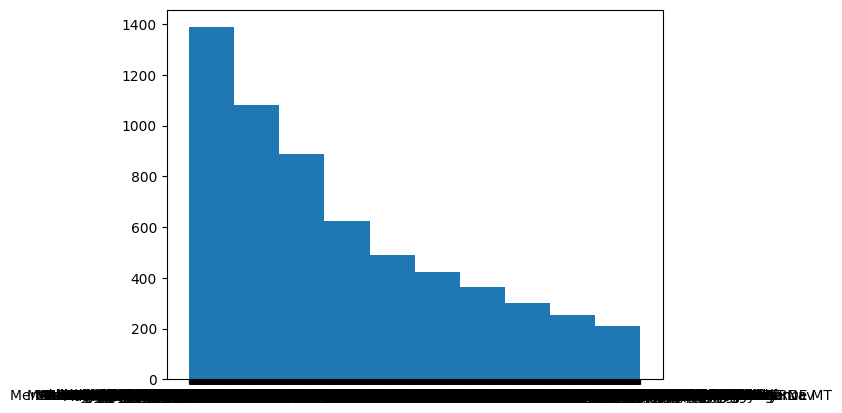

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df["Name"])

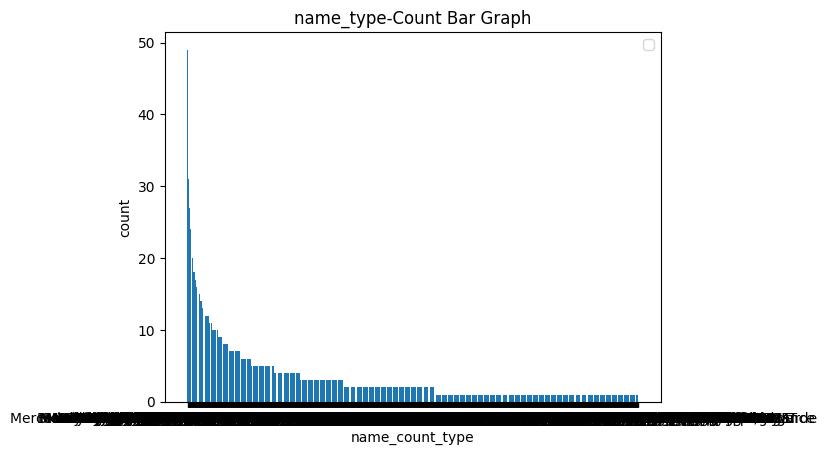

In [ ]:
label=name_count.index
x=name_count.values
plt.bar(label,x)
plt.xlabel("name_count_type")
plt.ylabel("count")
plt.title("name_type-Count Bar Graph")
plt.legend()

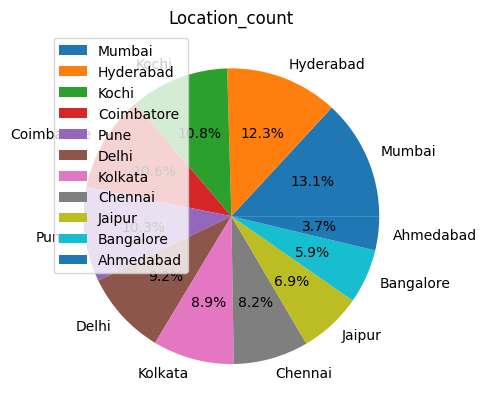

In [ ]:
plt.pie(x=location_count.values,labels=location_count.index,autopct="%1.1f%%")
plt.title("Location_count")
plt.legend()

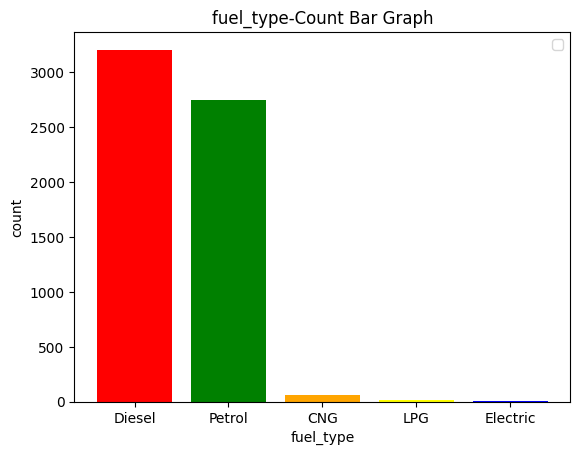

In [ ]:
label=fuel_type_count.index
x=fuel_type_count.values
plt.bar(label,x,color=["red","green","orange","yellow","blue"])
plt.xlabel("fuel_type")
plt.ylabel("count")
plt.title("fuel_type-Count Bar Graph")
plt.legend()

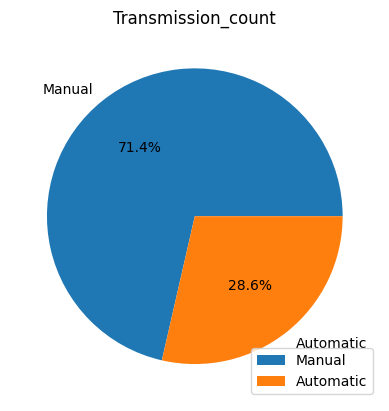

In [ ]:
plt.pie(x=Transmission_count.values,labels=Transmission_count.index,autopct="%1.1f%%")
plt.title("Transmission_count")
plt.legend()

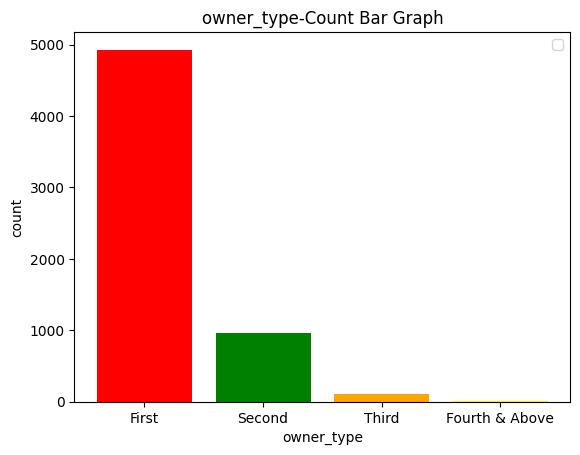

In [ ]:
label=Owner_Type_count.index
x=Owner_Type_count.values
plt.bar(label,x,color=["red","green","orange","yellow"])
plt.xlabel("owner_type")
plt.ylabel("count")
plt.title("owner_type-Count Bar Graph")
plt.legend()

get_dummies

In [ ]:
df1=pd.get_dummies(df[["Location","Fuel_Type","Transmission","Owner_Type"]],drop_first=True)
df1

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
6015,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
6016,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
6017,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0


In [ ]:
df2=pd.concat([df,df1],axis=1)
df2

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,...,1,0,0,0,0,0,1,0,0,0
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,...,0,1,1,0,0,0,1,0,0,0
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,...,0,0,0,0,0,1,1,0,0,0
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,...,0,0,1,0,0,0,1,0,0,0
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,...,0,0,1,0,0,0,1,0,0,0
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,...,0,0,1,0,0,0,1,0,0,0
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,...,0,0,1,0,0,0,1,0,1,0
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,...,0,0,0,0,0,1,1,0,0,0


In [ ]:
df2.dtypes

Unnamed: 0                     int64
Name                          object
Location                      object
Year                           int64
Kilometers_Driven              int64
Fuel_Type                     object
Transmission                  object
Owner_Type                    object
Mileage                       object
Engine                        object
Power                         object
Seats                        float64
New_Price                     object
Price                        float64
Location_Bangalore             uint8
Location_Chennai               uint8
Location_Coimbatore            uint8
Location_Delhi                 uint8
Location_Hyderabad             uint8
Location_Jaipur                uint8
Location_Kochi                 uint8
Location_Kolkata               uint8
Location_Mumbai                uint8
Location_Pune                  uint8
Fuel_Type_Diesel               uint8
Fuel_Type_Electric             uint8
Fuel_Type_LPG                  uint8
F

In [ ]:
df2.drop(["Unnamed: 0","Name","Location","Fuel_Type","Transmission","Owner_Type","New_Price","Fuel_Type_Electric"], axis=1, inplace=True)
df2

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,2015,41000,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,0,0,0,...,0,0,1,1,0,0,1,0,0,0
2,2011,46000,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,0,1,0,...,0,0,0,0,0,1,1,0,0,0
3,2012,87000,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,0,1,0,...,0,0,0,1,0,0,1,0,0,0
4,2013,40670,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,0,0,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.4 kmpl,1248 CC,74 bhp,5.0,4.75,0,0,0,...,0,0,0,1,0,0,1,0,0,0
6015,2015,100000,24.4 kmpl,1120 CC,71 bhp,5.0,4.00,0,0,0,...,0,0,0,1,0,0,1,0,0,0
6016,2012,55000,14.0 kmpl,2498 CC,112 bhp,8.0,2.90,0,0,0,...,0,0,0,1,0,0,1,0,1,0
6017,2013,46000,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65,0,0,0,...,1,0,0,0,0,1,1,0,0,0


In [ ]:
df2["Mileage"]=df2["Mileage"].str.replace("km/kg","")
df2

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.6,998 CC,58.16 bhp,5.0,1.75,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,2015,41000,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,0,0,0,...,0,0,1,1,0,0,1,0,0,0
2,2011,46000,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,0,1,0,...,0,0,0,0,0,1,1,0,0,0
3,2012,87000,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,0,1,0,...,0,0,0,1,0,0,1,0,0,0
4,2013,40670,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,0,0,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.4 kmpl,1248 CC,74 bhp,5.0,4.75,0,0,0,...,0,0,0,1,0,0,1,0,0,0
6015,2015,100000,24.4 kmpl,1120 CC,71 bhp,5.0,4.00,0,0,0,...,0,0,0,1,0,0,1,0,0,0
6016,2012,55000,14.0 kmpl,2498 CC,112 bhp,8.0,2.90,0,0,0,...,0,0,0,1,0,0,1,0,1,0
6017,2013,46000,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65,0,0,0,...,1,0,0,0,0,1,1,0,0,0


In [ ]:
df2["Mileage"]=df2["Mileage"].str.replace("kmpl","")
df2

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.6,998 CC,58.16 bhp,5.0,1.75,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,2015,41000,19.67,1582 CC,126.2 bhp,5.0,12.50,0,0,0,...,0,0,1,1,0,0,1,0,0,0
2,2011,46000,18.2,1199 CC,88.7 bhp,5.0,4.50,0,1,0,...,0,0,0,0,0,1,1,0,0,0
3,2012,87000,20.77,1248 CC,88.76 bhp,7.0,6.00,0,1,0,...,0,0,0,1,0,0,1,0,0,0
4,2013,40670,15.2,1968 CC,140.8 bhp,5.0,17.74,0,0,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.4,1248 CC,74 bhp,5.0,4.75,0,0,0,...,0,0,0,1,0,0,1,0,0,0
6015,2015,100000,24.4,1120 CC,71 bhp,5.0,4.00,0,0,0,...,0,0,0,1,0,0,1,0,0,0
6016,2012,55000,14.0,2498 CC,112 bhp,8.0,2.90,0,0,0,...,0,0,0,1,0,0,1,0,1,0
6017,2013,46000,18.9,998 CC,67.1 bhp,5.0,2.65,0,0,0,...,1,0,0,0,0,1,1,0,0,0


In [ ]:
df2["Engine"]=df2["Engine"].str.replace("CC","")
df2

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.6,998,58.16 bhp,5.0,1.75,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,2015,41000,19.67,1582,126.2 bhp,5.0,12.50,0,0,0,...,0,0,1,1,0,0,1,0,0,0
2,2011,46000,18.2,1199,88.7 bhp,5.0,4.50,0,1,0,...,0,0,0,0,0,1,1,0,0,0
3,2012,87000,20.77,1248,88.76 bhp,7.0,6.00,0,1,0,...,0,0,0,1,0,0,1,0,0,0
4,2013,40670,15.2,1968,140.8 bhp,5.0,17.74,0,0,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.4,1248,74 bhp,5.0,4.75,0,0,0,...,0,0,0,1,0,0,1,0,0,0
6015,2015,100000,24.4,1120,71 bhp,5.0,4.00,0,0,0,...,0,0,0,1,0,0,1,0,0,0
6016,2012,55000,14.0,2498,112 bhp,8.0,2.90,0,0,0,...,0,0,0,1,0,0,1,0,1,0
6017,2013,46000,18.9,998,67.1 bhp,5.0,2.65,0,0,0,...,1,0,0,0,0,1,1,0,0,0


In [ ]:
df2["Power"]=df2["Power"].str.replace("bhp","")
df2

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.6,998,58.16,5.0,1.75,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,2015,41000,19.67,1582,126.2,5.0,12.50,0,0,0,...,0,0,1,1,0,0,1,0,0,0
2,2011,46000,18.2,1199,88.7,5.0,4.50,0,1,0,...,0,0,0,0,0,1,1,0,0,0
3,2012,87000,20.77,1248,88.76,7.0,6.00,0,1,0,...,0,0,0,1,0,0,1,0,0,0
4,2013,40670,15.2,1968,140.8,5.0,17.74,0,0,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.4,1248,74,5.0,4.75,0,0,0,...,0,0,0,1,0,0,1,0,0,0
6015,2015,100000,24.4,1120,71,5.0,4.00,0,0,0,...,0,0,0,1,0,0,1,0,0,0
6016,2012,55000,14.0,2498,112,8.0,2.90,0,0,0,...,0,0,0,1,0,0,1,0,1,0
6017,2013,46000,18.9,998,67.1,5.0,2.65,0,0,0,...,1,0,0,0,0,1,1,0,0,0


In [ ]:
df2["Engine"]=df2['Engine'].str.replace("null","0")
df2["Power"]=df2['Power'].str.replace("null","0")
df2["Mileage"]=df2['Mileage'].str.replace("null","0")
df2

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.6,998,58.16,5.0,1.75,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,2015,41000,19.67,1582,126.2,5.0,12.50,0,0,0,...,0,0,1,1,0,0,1,0,0,0
2,2011,46000,18.2,1199,88.7,5.0,4.50,0,1,0,...,0,0,0,0,0,1,1,0,0,0
3,2012,87000,20.77,1248,88.76,7.0,6.00,0,1,0,...,0,0,0,1,0,0,1,0,0,0
4,2013,40670,15.2,1968,140.8,5.0,17.74,0,0,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.4,1248,74,5.0,4.75,0,0,0,...,0,0,0,1,0,0,1,0,0,0
6015,2015,100000,24.4,1120,71,5.0,4.00,0,0,0,...,0,0,0,1,0,0,1,0,0,0
6016,2012,55000,14.0,2498,112,8.0,2.90,0,0,0,...,0,0,0,1,0,0,1,0,1,0
6017,2013,46000,18.9,998,67.1,5.0,2.65,0,0,0,...,1,0,0,0,0,1,1,0,0,0


In [ ]:
#change datatype
df2["Engine"]=df2["Engine"].astype(float)
df2["Mileage"]=df2["Mileage"].astype(float)
df2["Power"]=df2["Power"].astype(float)

In [ ]:
df2.dtypes

Year                           int64
Kilometers_Driven              int64
Mileage                      float64
Engine                       float64
Power                        float64
Seats                        float64
Price                        float64
Location_Bangalore             uint8
Location_Chennai               uint8
Location_Coimbatore            uint8
Location_Delhi                 uint8
Location_Hyderabad             uint8
Location_Jaipur                uint8
Location_Kochi                 uint8
Location_Kolkata               uint8
Location_Mumbai                uint8
Location_Pune                  uint8
Fuel_Type_Diesel               uint8
Fuel_Type_LPG                  uint8
Fuel_Type_Petrol               uint8
Transmission_Manual            uint8
Owner_Type_Fourth & Above      uint8
Owner_Type_Second              uint8
Owner_Type_Third               uint8
dtype: object

In [ ]:
df2.isna().sum()

Year                          0
Kilometers_Driven             0
Mileage                       2
Engine                       36
Power                        36
Seats                        42
Price                         0
Location_Bangalore            0
Location_Chennai              0
Location_Coimbatore           0
Location_Delhi                0
Location_Hyderabad            0
Location_Jaipur               0
Location_Kochi                0
Location_Kolkata              0
Location_Mumbai               0
Location_Pune                 0
Fuel_Type_Diesel              0
Fuel_Type_LPG                 0
Fuel_Type_Petrol              0
Transmission_Manual           0
Owner_Type_Fourth & Above     0
Owner_Type_Second             0
Owner_Type_Third              0
dtype: int64

In [ ]:
#replace 0 in mileage, power , engine with non zero number
df2.loc[df2.Mileage==0,"Mileage"]=np.NaN
df2.loc[df2.Power==0,"Power"]=np.NaN


In [ ]:
df2.isna().sum()

Year                           0
Kilometers_Driven              0
Mileage                       70
Engine                        36
Power                        143
Seats                         42
Price                          0
Location_Bangalore             0
Location_Chennai               0
Location_Coimbatore            0
Location_Delhi                 0
Location_Hyderabad             0
Location_Jaipur                0
Location_Kochi                 0
Location_Kolkata               0
Location_Mumbai                0
Location_Pune                  0
Fuel_Type_Diesel               0
Fuel_Type_LPG                  0
Fuel_Type_Petrol               0
Transmission_Manual            0
Owner_Type_Fourth & Above      0
Owner_Type_Second              0
Owner_Type_Third               0
dtype: int64

In [ ]:
# replace mileage,engine,power with mean
#replace seat with mode

df2["Mileage"]=df2["Mileage"].fillna(df2["Mileage"].mean())
df2["Engine"]=df2["Engine"].fillna(df2["Engine"].mean())
df2["Power"]=df2["Power"].fillna(df2["Power"].mean())
df2["Seats"]=df2["Seats"].fillna(df2["Seats"].mode()[0])


In [ ]:
df2.isna().sum()

Year                         0
Kilometers_Driven            0
Mileage                      0
Engine                       0
Power                        0
Seats                        0
Price                        0
Location_Bangalore           0
Location_Chennai             0
Location_Coimbatore          0
Location_Delhi               0
Location_Hyderabad           0
Location_Jaipur              0
Location_Kochi               0
Location_Kolkata             0
Location_Mumbai              0
Location_Pune                0
Fuel_Type_Diesel             0
Fuel_Type_LPG                0
Fuel_Type_Petrol             0
Transmission_Manual          0
Owner_Type_Fourth & Above    0
Owner_Type_Second            0
Owner_Type_Third             0
dtype: int64

In [ ]:
x=df2.drop(["Price"], axis=1)
x

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.60,998.0,58.16,5.0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.40,1248.0,74.00,5.0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
6015,2015,100000,24.40,1120.0,71.00,5.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
6016,2012,55000,14.00,2498.0,112.00,8.0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
6017,2013,46000,18.90,998.0,67.10,5.0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0


In [ ]:
x.ndim

2

In [ ]:
y=df2["Price"]
y

0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
6014     4.75
6015     4.00
6016     2.90
6017     2.65
6018     2.50
Name: Price, Length: 6019, dtype: float64

In [ ]:
y.ndim

1

In [ ]:
df_test=pd.read_csv("/content/test-data.csv")

In [ ]:
df_test.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [ ]:
df_test.tail()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
1229,1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN
1230,1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN
1231,1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN
1232,1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN
1233,1233,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN


In [ ]:
df_test.dtypes

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
dtype: object

In [ ]:
df_test.shape

(1234, 13)

In [ ]:
df_test.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

In [ ]:
name=df_test["Name"].value_counts()
location=df_test["Location"].value_counts()
fuel_type=df_test["Fuel_Type"].value_counts()
transmission=df_test["Transmission"].value_counts()
owner_type=df_test["Owner_Type"].value_counts()

(array([179., 174., 143., 141., 128., 115., 100.,  90.,  85.,  79.]),
 array([  0. ,  76.8, 153.6, 230.4, 307.2, 384. , 460.8, 537.6, 614.4,
        691.2, 768. ]),
 <BarContainer object of 10 artists>)

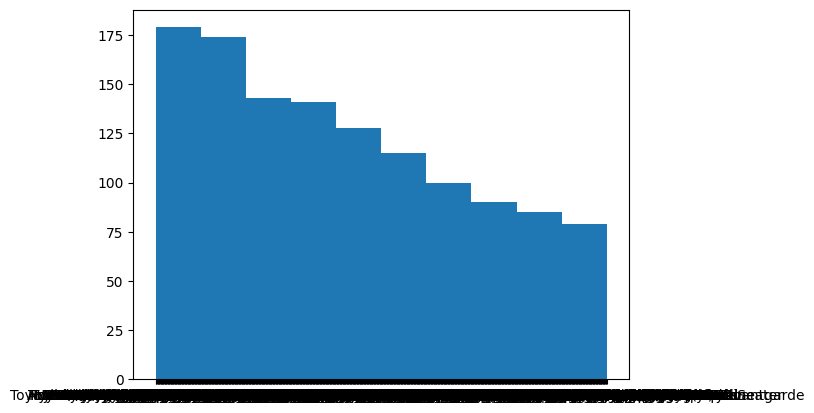

In [ ]:
plt.hist(df_test["Name"])

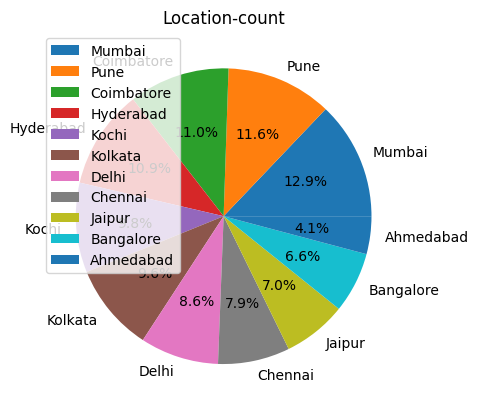

In [ ]:
plt.pie(x=location.values,labels=location.index,autopct="%1.1f%%")
plt.title("Location-count")
plt.legend()

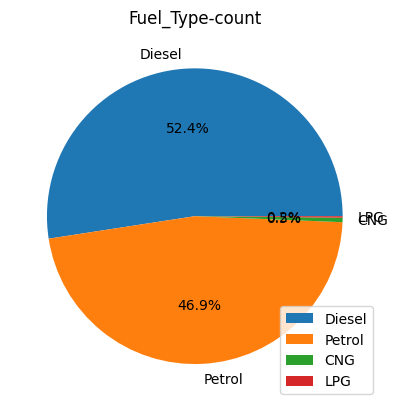

In [ ]:
plt.pie(x=fuel_type.values,labels=fuel_type.index,autopct="%1.1f%%")
plt.title("Fuel_Type-count")
plt.legend()

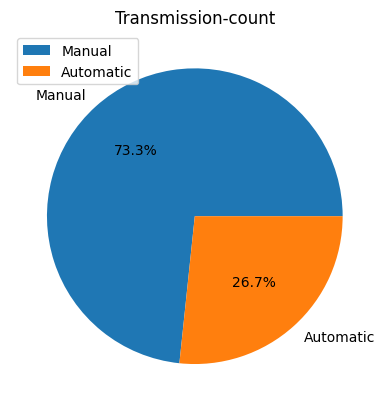

In [ ]:
plt.pie(x=transmission.values,labels=transmission.index,autopct="%1.1f%%")
plt.title("Transmission-count")
plt.legend()

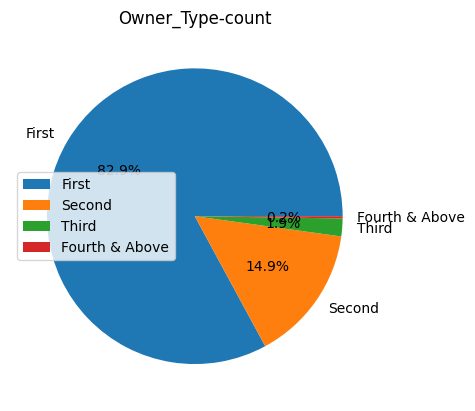

In [ ]:
plt.pie(x=owner_type.values,labels=owner_type.index,autopct="%1.1f%%")
plt.title("Owner_Type-count")
plt.legend()

In [ ]:
df3=pd.get_dummies(df_test[["Location","Fuel_Type","Transmission","Owner_Type"]],drop_first=True)
df3

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0
2,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1230,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1231,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
1232,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1


In [ ]:
df4=pd.concat([df_test,df3],axis=1)
df4

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,...,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,...,0,0,0,0,0,0,1,0,0,0
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,...,0,0,0,0,0,1,1,0,1,0
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,...,0,1,0,1,0,0,1,0,0,0
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,...,0,0,0,1,0,0,1,0,0,0
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,...,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,...,0,0,0,1,0,0,1,0,0,0
1230,1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,...,0,1,0,0,0,1,0,0,0,0
1231,1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,...,1,0,0,1,0,0,1,0,0,0
1232,1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,...,0,0,1,0,0,1,0,0,0,1


In [ ]:
df4.dtypes

Unnamed: 0                     int64
Name                          object
Location                      object
Year                           int64
Kilometers_Driven              int64
Fuel_Type                     object
Transmission                  object
Owner_Type                    object
Mileage                       object
Engine                        object
Power                         object
Seats                        float64
New_Price                     object
Location_Bangalore             uint8
Location_Chennai               uint8
Location_Coimbatore            uint8
Location_Delhi                 uint8
Location_Hyderabad             uint8
Location_Jaipur                uint8
Location_Kochi                 uint8
Location_Kolkata               uint8
Location_Mumbai                uint8
Location_Pune                  uint8
Fuel_Type_Diesel               uint8
Fuel_Type_LPG                  uint8
Fuel_Type_Petrol               uint8
Transmission_Manual            uint8
O

In [ ]:
df4.drop(["Unnamed: 0","Name","Location","Fuel_Type","Transmission","Owner_Type","New_Price"], axis=1, inplace=True)
df4

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2014,40929,32.26 km/kg,998 CC,58.2 bhp,4.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,2013,54493,24.7 kmpl,796 CC,47.3 bhp,5.0,0,0,1,0,...,0,0,0,0,0,1,1,0,1,0
2,2017,34000,13.68 kmpl,2393 CC,147.8 bhp,7.0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
3,2012,139000,23.59 kmpl,1364 CC,null bhp,5.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,2014,29000,18.5 kmpl,1197 CC,82.85 bhp,5.0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,2011,89411,20.54 kmpl,1598 CC,103.6 bhp,5.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1230,2015,59000,17.21 kmpl,1197 CC,103.6 bhp,5.0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1231,2012,28000,23.08 kmpl,1461 CC,63.1 bhp,5.0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
1232,2013,52262,17.2 kmpl,1197 CC,103.6 bhp,5.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [ ]:
df4["Mileage"]=df4["Mileage"].str.replace("km/kg","")
df4["Mileage"]=df4["Mileage"].str.replace("kmpl","")
df4["Engine"]=df4["Engine"].str.replace("CC","")
df4["Power"]=df4["Power"].str.replace("bhp","")

In [ ]:
df4["Engine"]=df4['Engine'].str.replace("null","0")
df4["Power"]=df4['Power'].str.replace("null","0")
df4["Mileage"]=df4['Mileage'].str.replace("null","0")
df4

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2014,40929,32.26,998,58.2,4.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,2013,54493,24.7,796,47.3,5.0,0,0,1,0,...,0,0,0,0,0,1,1,0,1,0
2,2017,34000,13.68,2393,147.8,7.0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
3,2012,139000,23.59,1364,0,5.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,2014,29000,18.5,1197,82.85,5.0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,2011,89411,20.54,1598,103.6,5.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1230,2015,59000,17.21,1197,103.6,5.0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1231,2012,28000,23.08,1461,63.1,5.0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
1232,2013,52262,17.2,1197,103.6,5.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [ ]:
df4["Engine"]=df4["Engine"].astype(float)
df4["Mileage"]=df4["Mileage"].astype(float)
df4["Power"]=df4["Power"].astype(float)

In [ ]:
df4.loc[df4.Mileage==0,"Mileage"]=np.NaN
df4.loc[df4.Power==0,"Power"]=np.NaN


In [ ]:
df4["Mileage"]=df4["Mileage"].fillna(df4["Mileage"].mean())
df4["Engine"]=df4["Engine"].fillna(df4["Engine"].mean())
df4["Power"]=df4["Power"].fillna(df4["Power"].mean())
df4["Seats"]=df4["Seats"].fillna(df4["Seats"].mode()[0])


In [ ]:
df4.isna().sum()

Year                         0
Kilometers_Driven            0
Mileage                      0
Engine                       0
Power                        0
Seats                        0
Location_Bangalore           0
Location_Chennai             0
Location_Coimbatore          0
Location_Delhi               0
Location_Hyderabad           0
Location_Jaipur              0
Location_Kochi               0
Location_Kolkata             0
Location_Mumbai              0
Location_Pune                0
Fuel_Type_Diesel             0
Fuel_Type_LPG                0
Fuel_Type_Petrol             0
Transmission_Manual          0
Owner_Type_Fourth & Above    0
Owner_Type_Second            0
Owner_Type_Third             0
dtype: int64

In [ ]:
df4.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2014,40929,32.26,998.0,58.20000,4.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,2013,54493,24.70,796.0,47.30000,5.0,0,0,1,0,...,0,0,0,0,0,1,1,0,1,0
2,2017,34000,13.68,2393.0,147.80000,7.0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
3,2012,139000,23.59,1364.0,110.38042,5.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,2014,29000,18.50,1197.0,82.85000,5.0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0


In [ ]:
#model selection
#Fuel_type_electric is missing
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)
y_pred=model.predict(df4)
y_pred

array([ 2.87588492, -1.29344912, 16.1069494 , ...,  0.1378514 ,
        9.27293255, 21.48043251])